In [82]:
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import explore
import warnings
warnings.filterwarnings("ignore")

### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data("iris")

### print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

### print the column names

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### print the data type of each column

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

### print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe().T
# I do not believe we need to rescale because all of the data is structured in the same units

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
df_excel = pd.read_excel(io = "/Users/jaredvahle/CodeUp-Datascience/classification-exercises/Spreadsheets_Exercises_Solutions.xlsx", sheet_name = 0)

In [9]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-12,0.0,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-12,0.0,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-12,0.0,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-12,0.0,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-12,0.0,False,2 Year,One Line,No Internet Service,NaN


### assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel.head(100)

In [11]:
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-12 00:00:00.000,0.00,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,One Line,No Internet Service,NaN
5,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,Two or More Lines,No Internet Service,NaN
6,4075-WKNIU,Female,0,Yes,Yes,2,1,2,Mailed check,73.35,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,Two or More Lines,DSL,NaN
7,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,Two or More Lines,No Internet Service,NaN
8,4472-LVYGI,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),52.55,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,No Phone Service,DSL,NaN
9,5709-LVOEQ,Female,0,Yes,Yes,1,1,2,Mailed check,80.85,...,NaN,NaN,NaN,2021-08-12 00:00:00.000,0.00,False,2 Year,One Line,DSL,NaN


### print the number of rows of your original dataframe

In [12]:
df_excel.shape

(7043, 31)

###  print the first 5 column names

In [13]:
df_excel_sample.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### print the column names that have a data type of object

In [14]:
df_excel.keys()

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female',
       'has_churned', 'has_phone', 'has_internet', 'has_phone_and_internet',
       'partner_dependents', 'no_partners_no_dependents',
       'no_dependents_yes_partners', 'dependents_no_partners',
       'yes_dependents_and_partners', 'Unnamed: 23', 'start_date',
       'average_monthly_charges', 'validate_monthly_charges',
       'contract_type_desc', 'phone_type_desc', 'internet_type_desc',
       'Unnamed: 30'],
      dtype='object')

In [15]:
df_excel.dtypes

customer_id                            object
gender                                 object
is_senior_citizen                       int64
partner                                object
dependents                             object
phone_service                           int64
internet_service                        int64
contract_type                           int64
payment_type                           object
monthly_charges                       float64
total_charges                         float64
churn                                  object
tenure                                float64
is_female                                bool
has_churned                              bool
has_phone                                bool
has_internet                             bool
has_phone_and_internet                   bool
partner_dependents                      int64
no_partners_no_dependents             float64
no_dependents_yes_partners            float64
dependents_no_partners            

In [16]:
df_excel.select_dtypes(include = ["object"]).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn', 'contract_type_desc', 'phone_type_desc', 'internet_type_desc'],
      dtype='object')

### compute the range for each of the numeric variables.

In [17]:
only_numeric = df_excel.select_dtypes(include = ["float64"]).drop(axis = 1, labels = ["no_partners_no_dependents","no_dependents_yes_partners","dependents_no_partners","yes_dependents_and_partners","Unnamed: 23","Unnamed: 30"]).copy()

In [18]:
only_numeric

,monthly_charges,total_charges,tenure,average_monthly_charges
0,56.05,NaN,0.000000,0.00
1,20.00,NaN,0.000000,0.00
2,61.90,NaN,0.000000,0.00
3,19.70,NaN,0.000000,0.00
4,20.25,NaN,0.000000,0.00
...,...,...,...,...
7038,55.15,742.90,13.470535,55.15
7039,85.10,1873.70,22.017626,85.10
7040,50.30,92.75,1.843936,50.30
7041,67.85,4627.65,68.204127,67.85


In [19]:
numeric_values_range= only_numeric.apply(lambda x: x.max() - x.min())

In [20]:
numeric_values_range

monthly_charges             100.500000
total_charges              8666.000000
tenure                       79.341772
average_monthly_charges     118.750000
dtype: float64

### Read the data from this google sheet into a dataframe, df_google

In [21]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

### print the first 3 rows

In [22]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### print the number of rows and columns

In [23]:
df_google.shape

(891, 12)

### print the column names

In [24]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### print the data type of each column

In [25]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### print the summary statistics for each of the numeric variables

In [26]:
df_google.select_dtypes(include = ["int64","float64"]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### print the unique values for each of your categorical variables

In [27]:
for column in df_google.select_dtypes(include = "object").columns:
    print(f"Values in the {column} column:")
    print(df_google[column].value_counts())
    print("------")
    print()

Values in the Name column:
Lewy, Mr. Ervin G                                 1
Bourke, Mr. John                                  1
Collyer, Mrs. Harvey (Charlotte Annie Tate)       1
Sandstrom, Miss. Marguerite Rut                   1
Ford, Miss. Robina Maggie "Ruby"                  1
                                                 ..
Futrelle, Mr. Jacques Heath                       1
McCormack, Mr. Thomas Joseph                      1
Robins, Mrs. Alexander A (Grace Charity Laury)    1
Penasco y Castellana, Mr. Victor de Satode        1
Keane, Mr. Andrew "Andy"                          1
Name: Name, Length: 891, dtype: int64
------

Values in the Sex column:
male      577
female    314
Name: Sex, dtype: int64
------

Values in the Ticket column:
CA. 2343    7
1601        7
347082      7
347088      6
3101295     6
           ..
384461      1
365222      1
28228       1
349242      1
323592      1
Name: Ticket, Length: 681, dtype: int64
------

Values in the Cabin column:
B96 B98   

In [28]:
df_google.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
df_google.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [30]:
df_google.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
df_google.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Make a new python module, acquire.py to hold the following data aquisition functions:

In [32]:
import env
import os

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

### Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [33]:
def get_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile("titanic.csv"):
        return pd.read_csv("titanic.csv")
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv("titanic.csv")

        # Return the dataframe to the calling code
        return df 

In [34]:
get_titanic_data().head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [35]:
def get_iris_data():
    filename = "iris.csv"

    if os.path.isfile("iris.csv"):
        return pd.read_csv("iris.csv")
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('''
SELECT *
FROM species
JOIN measurements ON measurements.species_id = species.species_id;
''', get_connection('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv("iris.csv")

        # Return the dataframe to the calling code
        return df

In [36]:
get_iris_data().head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id.1
0,0,1,setosa,1,5.1,3.5,1.4,0.2,1
1,1,1,setosa,2,4.9,3.0,1.4,0.2,1
2,2,1,setosa,3,4.7,3.2,1.3,0.2,1
3,3,1,setosa,4,4.6,3.1,1.5,0.2,1
4,4,1,setosa,5,5.0,3.6,1.4,0.2,1


### Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [37]:
def get_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile("titanic.csv"):
        return pd.read_csv("titanic.csv")
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv("titanic.csv")

        # Return the dataframe to the calling code
        return df 

In [38]:
def get_iris_data():
    filename = "iris.csv"

    if os.path.isfile("iris.csv"):
        return pd.read_csv("iris.csv")
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('''
SELECT *
FROM species
JOIN measurements ON measurements.species_id = species.species_id;
''', get_connection('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv("iris.csv")

        # Return the dataframe to the calling code
        return df

## Section 1 - iris_db: 
> Using iris data from our mySQL server and the methods used in the lesson above:
1. Acquire, prepare & split your data.

In [71]:
df = get_iris_data()

In [67]:
def clean_iris(df):
    df.drop_duplicates(inplace = True)
    df.drop(columns = ["species_id.1","Unnamed: 0","measurement_id"],inplace = True)
    df.rename(columns = {"species_name":"species"}, inplace = True)
    df_dummy = pd.get_dummies(df[["species"]],drop_first = True)
    return pd.concat([df, df_dummy], axis=1)

In [41]:
def split_iris_data(df):
    """
    splits the data in train validate and test 
    """
    train, test = train_test_split(df, test_size = .2, random_state = 50, stratify = df.species)
    train, validate = train_test_split(train, test_size=.25, random_state=50, stratify = train.species)
    
    return train, validate, test

In [42]:
def prep_iris_data(df):
    """
    takes in a data from iris database, cleans the data, splits the data
    in train validate test. 
    Returns three dataframes train, validate and test.   
    """
    df = clean_iris(df)
    train, validate, test = split_iris_data(df)
    return train, validate, test

In [72]:
train,validate,test = prep_iris_data(df)

# EXPLORATION ANALYSIS SECTION

### Univariate Stats
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [73]:
train.head()

,species_id,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
67,2,versicolor,5.8,2.7,4.1,1.0,1,0
127,3,virginica,6.1,3.0,4.9,1.8,0,1
51,2,versicolor,6.4,3.2,4.5,1.5,1,0
43,1,setosa,5.0,3.5,1.6,0.6,0,0
29,1,setosa,4.7,3.2,1.6,0.2,0,0


In [76]:
cat_vars = ["species_id","species"]
quant_vars = ["sepal_length","sepal_width","petal_length","petal_width"]

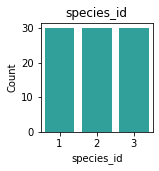

   species_id  Count  Percent
1           2     30    33.33
2           3     30    33.33
3           1     30    33.33
_________________________________________________________________


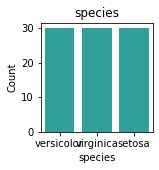

               species  Count  Percent
virginica   versicolor     30    33.33
setosa       virginica     30    33.33
versicolor      setosa     30    33.33
_________________________________________________________________


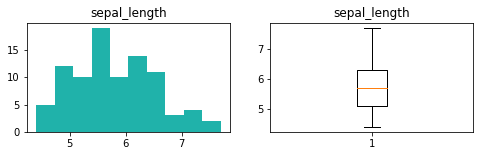

count    90.000000
mean      5.791111
std       0.743609
min       4.400000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.700000
Name: sepal_length, dtype: float64


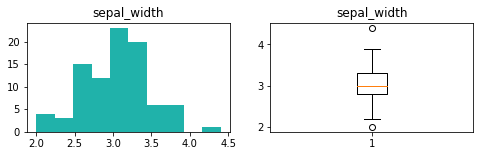

count    90.000000
mean      3.030000
std       0.429122
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64


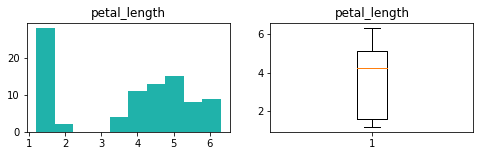

count    90.000000
mean      3.728889
std       1.705460
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.300000
Name: petal_length, dtype: float64


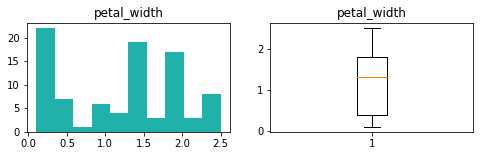

count    90.000000
mean      1.187778
std       0.743636
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [77]:
explore.explore_univariate(train,cat_vars,quant_vars)

In [ ]:
#come back to this to document findings

### Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

In [90]:
cat_vars = ["species"]

species 
_____________________

    chi2       p-value  degrees of freedom
0  180.0  7.456551e-38                   4

observed:
 species_id   1   2   3  All
species                    
setosa      30   0   0   30
versicolor   0  30   0   30
virginica    0   0  30   30
All         30  30  30   90

expected:
       0     1     2
0  10.0  10.0  10.0
1  10.0  10.0  10.0
2  10.0  10.0  10.0


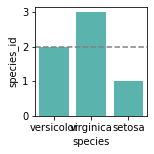


_____________________

sepal_length 
____________________



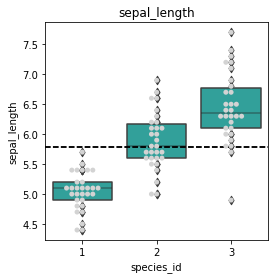

            count      mean       std  min  25%   50%    75%  max
species_id                                                       
1            30.0  5.046667  0.314844  4.4  4.9  5.10  5.200  5.7
2            30.0  5.883333  0.475673  5.0  5.6  5.80  6.175  6.9
3            30.0  6.443333  0.591132  4.9  6.1  6.35  6.775  7.7 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

sepal_width 
____________________



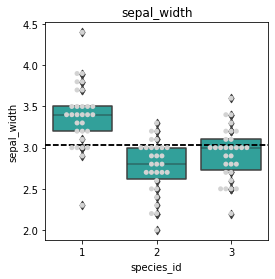

            count      mean       std  min    25%  50%  75%  max
species_id                                                      
1            30.0  3.386667  0.388395  2.3  3.200  3.4  3.5  4.4
2            30.0  2.773333  0.323700  2.0  2.625  2.8  3.0  3.3
3            30.0  2.930000  0.315300  2.2  2.725  3.0  3.1  3.6 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_length 
____________________



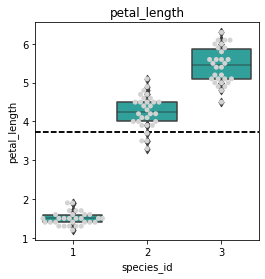

            count      mean       std  min  25%   50%    75%  max
species_id                                                       
1            30.0  1.493333  0.170057  1.2  1.4  1.50  1.600  1.9
2            30.0  4.250000  0.431317  3.3  4.0  4.25  4.500  5.1
3            30.0  5.443333  0.468809  4.5  5.1  5.45  5.875  6.3 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_width 
____________________



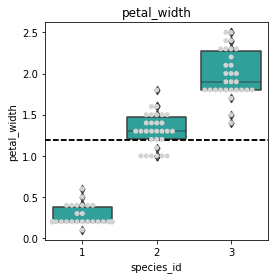

            count      mean       std  min  25%  50%    75%  max
species_id                                                      
1            30.0  0.266667  0.115470  0.1  0.2  0.2  0.375  0.6
2            30.0  1.306667  0.209981  1.0  1.2  1.3  1.475  1.8
3            30.0  1.990000  0.285693  1.4  1.8  1.9  2.275  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [91]:
explore.explore_bivariate(train,"species_id",cat_vars,quant_vars)

species_id 
_____________________

   chi2       p-value  degrees of freedom
0  90.0  2.862519e-20                   2

observed:
 species_versicolor   0   1  All
species_id                     
1                   30   0   30
2                    0  30   30
3                   30   0   30
All                 60  30   90

expected:
       0     1
0  20.0  10.0
1  20.0  10.0
2  20.0  10.0


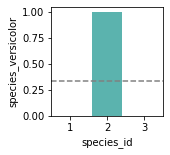


_____________________

measurement_type 
_____________________



KeyError: 'measurement_type'

In [120]:
explore.explore_bivariate(train,"species_versicolor",cat_vars,quant_vars)

### Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [94]:
train.head()

,species_id,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
67,2,versicolor,5.8,2.7,4.1,1.0,1,0
127,3,virginica,6.1,3.0,4.9,1.8,0,1
51,2,versicolor,6.4,3.2,4.5,1.5,1,0
43,1,setosa,5.0,3.5,1.6,0.6,0,0
29,1,setosa,4.7,3.2,1.6,0.2,0,0


In [106]:
train_dropped_col = train.drop(columns = ["species_versicolor","species_virginica"])

In [107]:
train_melt = train_dropped_col.melt(id_vars = ["species","species_id","species_versicolor"],var_name = "measurement_type",value_name = "measurement")

In [112]:
train_melt.head(100)

,species,species_id,measurement_type,measurement
0,versicolor,2,sepal_length,5.8
1,virginica,3,sepal_length,6.1
2,versicolor,2,sepal_length,6.4
3,setosa,1,sepal_length,5.0
4,setosa,1,sepal_length,4.7
5,versicolor,2,sepal_length,5.2
6,setosa,1,sepal_length,5.7
7,versicolor,2,sepal_length,6.7
8,virginica,3,sepal_length,6.4
9,setosa,1,sepal_length,5.1


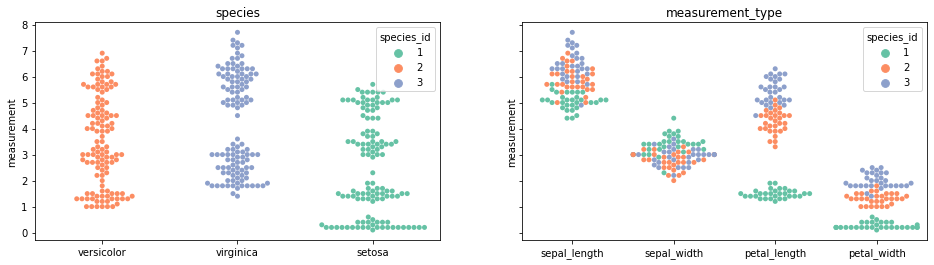

ValueError: There must be exactly two hue levels to use `split`.'

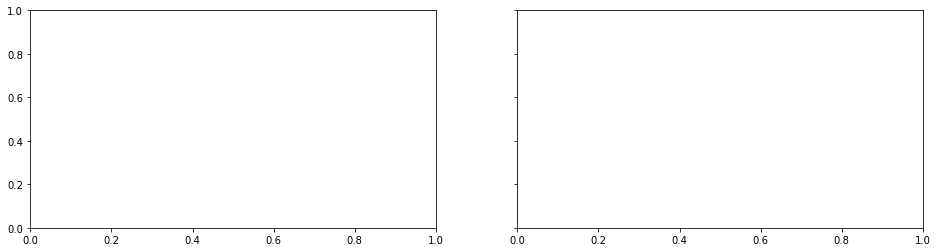

In [113]:
cat_vars = ["species","measurement_type"]
quant_vars = ["measurement"]
target = "species_id"
explore.explore_multivariate(train_melt,target,cat_vars,quant_vars)

In [114]:
train_dropped_col = train.drop(columns = ["species_virginica"])

In [115]:
train_melt = train_dropped_col.melt(id_vars = ["species","species_id","species_versicolor"],var_name = "measurement_type",value_name = "measurement")

In [117]:
train_melt.head()

,species,species_id,species_versicolor,measurement_type,measurement
0,versicolor,2,1,sepal_length,5.8
1,virginica,3,0,sepal_length,6.1
2,versicolor,2,1,sepal_length,6.4
3,setosa,1,0,sepal_length,5.0
4,setosa,1,0,sepal_length,4.7


ValueError: could not broadcast input array from shape (360,1) into shape (360,)

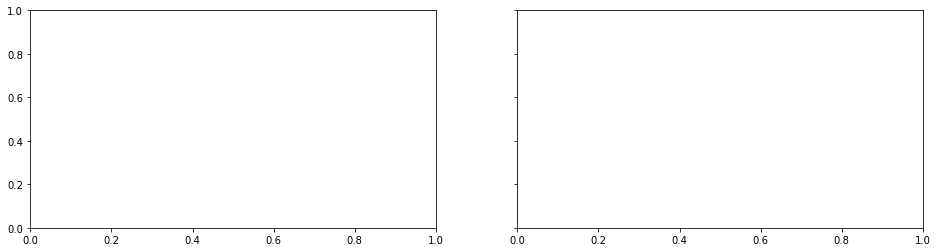

In [119]:
cat_vars = ["species_id","measurement_type"]
quant_vars = ["measurement"]
target = ["species_versicolor"]
explore.explore_multivariate(train_melt,target,cat_vars,quant_vars)

### QUESTIONS
- Does petal length and petal width have a corralative relationship
- Does sepal length and sepal width have a corralative relationship